In [ ]:
# Источник и описание полей датасета: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [1]:
# Импортируем нужные библиотеки
import pandas as pd
import requests,zipfile,io #работает с архивами
import matplotlib.pyplot as plt #работает с графиками и диаграммами
import seaborn as sns #работает с графиками и диаграммами
import numpy as np

In [2]:
# Указываем ссылку на архив с датасетом и создаем соотвествующий объект
r = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip')
z = zipfile.ZipFile(io.BytesIO(r.content))

In [3]:
# Просматриваем архив и выбираем нужный файл
z.namelist()

['bank-full.csv', 'bank-names.txt', 'bank.csv']

In [4]:
# Считываем датасет
df = pd.read_csv(z.open('bank-full.csv'), sep = ';')
df.sample(n = 10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
5383,24,technician,single,secondary,no,820,yes,no,unknown,23,may,665,1,-1,0,unknown,no
22546,32,technician,married,tertiary,no,0,no,no,cellular,22,aug,277,3,-1,0,unknown,no
120,56,technician,divorced,unknown,no,56,yes,no,unknown,5,may,439,1,-1,0,unknown,no
12361,44,services,married,secondary,no,-618,no,yes,unknown,27,jun,198,2,-1,0,unknown,no
38730,38,entrepreneur,married,secondary,no,157,no,yes,cellular,15,may,57,11,366,1,other,no
19617,36,technician,married,secondary,no,0,no,no,cellular,7,aug,171,2,-1,0,unknown,no
44073,56,blue-collar,married,primary,no,1014,no,no,unknown,2,jul,5,1,-1,0,unknown,no
24246,40,management,married,tertiary,no,8969,yes,no,cellular,17,nov,153,1,-1,0,unknown,no
18909,37,housemaid,married,primary,no,2410,no,no,cellular,4,aug,315,1,-1,0,unknown,no
8481,38,technician,married,secondary,no,27,yes,no,unknown,3,jun,404,4,-1,0,unknown,no


# Библиотека Matplotlib

In [5]:
# Выбор стиля оформления диаграмм
plt.style.use('fivethirtyeight')

In [6]:
# Меняем тип переменной
df['month'] = pd.to_datetime(df['month'], format='%b').dt.month

In [7]:
# Готовим данные для графика в виде сводной таблицы
data = df.groupby('month')['job'].agg(count = 'count').reset_index().sort_values(by = 'month')
data.head()

,month,count
0,1,1403
1,2,2649
2,3,477
3,4,2932
4,5,13766


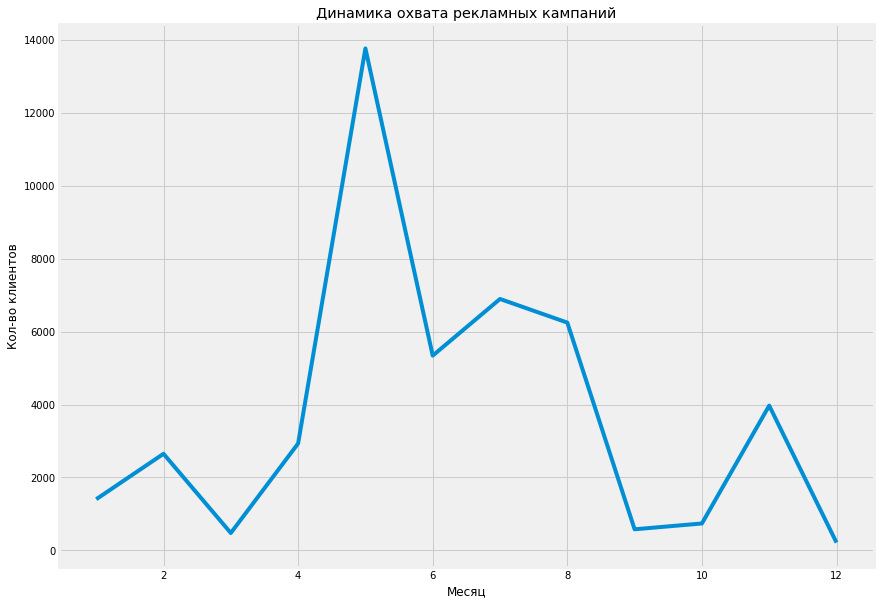

In [11]:
# Создаем линейный график

plt.figure(figsize = (13,10))

plt.plot(data['month'], data['count'])

plt.title('Динамика охвата рекламных кампаний')
plt.xlabel('Месяц')
plt.ylabel('Кол-во клиентов')

plt.show()

In [12]:
# Фильтруем и готовим данные по семеному положению
data1 = df.query('marital == "single"').groupby('month')['job'].agg(count = 'count').reset_index().sort_values(by = 'month')
data2 = df.query('marital == "married"').groupby('month')['job'].agg(count = 'count').reset_index().sort_values(by = 'month')
data1.head()

,month,count
0,1,537
1,2,926
2,3,183
3,4,918
4,5,4213


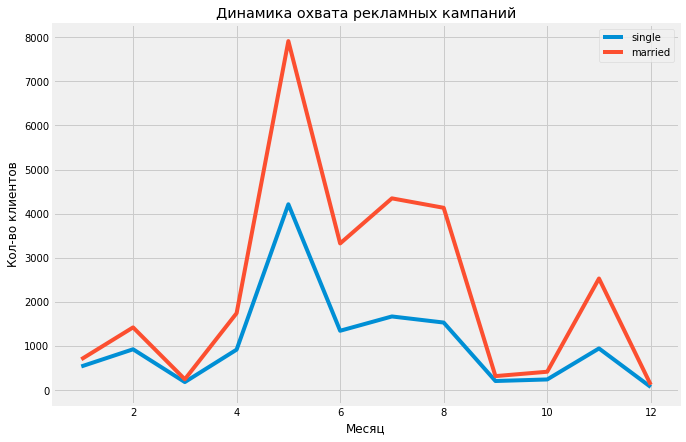

In [13]:
# Строим линейный график с отфильтрованными данными

plt.figure(figsize = (10,7))

plt.plot(data1['month'], data1['count'])
plt.plot(data2['month'], data2['count'])

plt.title('Динамика охвата рекламных кампаний')
plt.xlabel('Месяц')
plt.ylabel('Кол-во клиентов')
plt.legend(['single','married'])

plt.show()

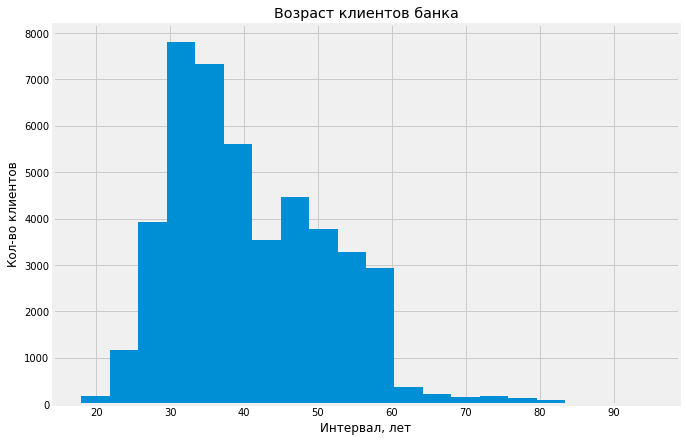

In [17]:
# Строим гистограмму в разрезе возраста

plt.figure(figsize = (10,7))

plt.hist(df['age'], bins = 20)

plt.title('Возраст клиентов банка')
plt.xlabel('Интервал, лет')
plt.ylabel('Кол-во клиентов')

plt.show()

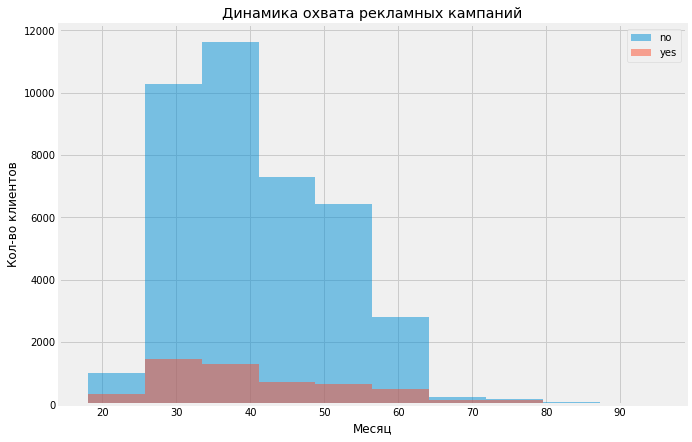

In [18]:
# Строим гистограмму в разрезе людей, ставших и не ставших клиентами депозита

plt.figure(figsize = (10,7))

plt.hist(df['age'].loc[df['y'] == 'no'], alpha = 0.5, label = 'no')
plt.hist(df['age'].loc[df['y'] == 'yes'], alpha = 0.5, label = 'yes')


plt.title('Динамика охвата рекламных кампаний')
plt.xlabel('Месяц')
plt.ylabel('Кол-во клиентов')
plt.legend()

plt.show()

In [ ]:
# Перекодируем переменную y
df['convert'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

In [ ]:
# Готовим данные для графика в виде сводной таблицы
data = df.query('age <  30').groupby('age')['convert'].sum().reset_index()
data.head()

,age,convert
0,18,7
1,19,11
2,20,15
3,21,22
4,22,40


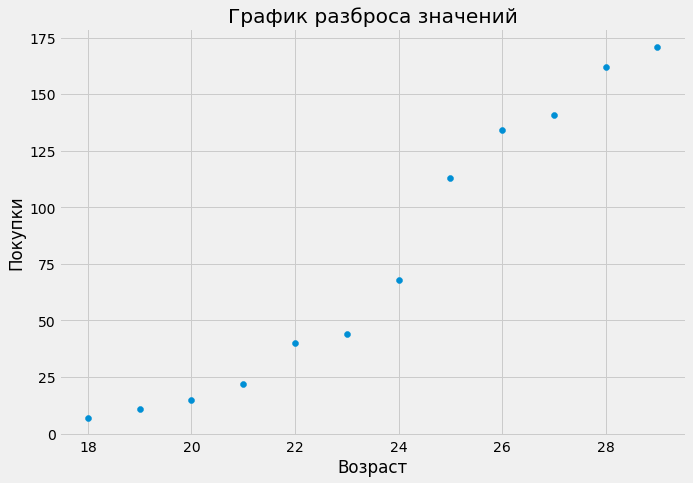

In [ ]:
# Строим диаграмму рассеяния

plt.figure(figsize = (10,7))

plt.scatter(data['age'], data['convert'])

plt.title('График разброса значений')
plt.xlabel('Возраст')
plt.ylabel('Покупки')

plt.show()

In [19]:
# Готовим данные для графика
data1 = df['duration'].loc[df['y']=='yes']
data2 = df['duration'].loc[df['y']=='no']
data1.head()

83     1042
86     1467
87     1389
129     579
168     673
Name: duration, dtype: int64

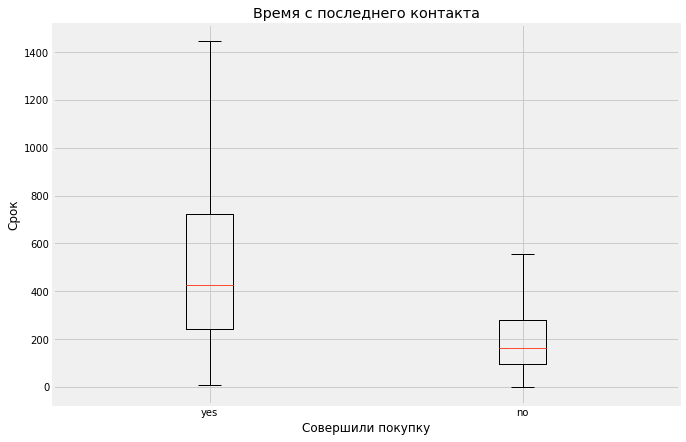

In [20]:
# Строим боксплот

plt.figure(figsize = (10,7))

plt.boxplot([data1, data2], showfliers=False)

plt.title('Время с последнего контакта')
plt.xlabel('Совершили покупку')
plt.ylabel('Срок')
plt.xticks([1, 2],['yes', 'no'])

plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


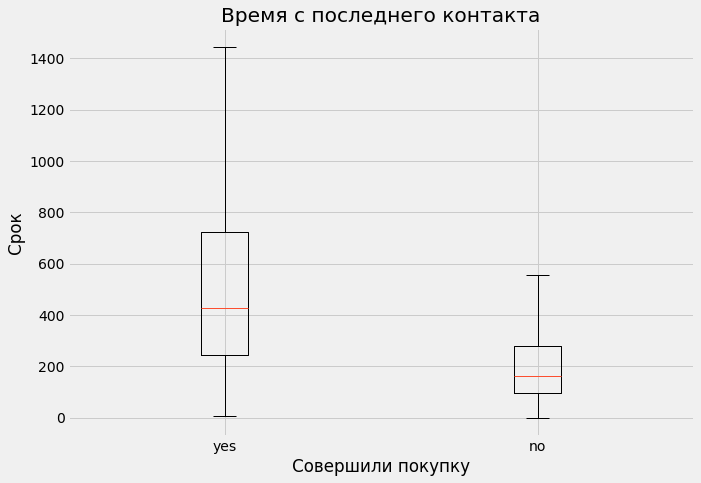

In [ ]:
# Строим боксплот без выбросов 

plt.figure(figsize = (10,7))

plt.boxplot([data1, data2], showfliers = False)

plt.title('Время с последнего контакта')
plt.xlabel('Совершили покупку')
plt.ylabel('Срок')
plt.xticks([1, 2],['yes', 'no'])

plt.show()

In [21]:
# Готовим данные для графика
data = df['job'].value_counts().reset_index()
data.head()

,index,job
0,blue-collar,9732
1,management,9458
2,technician,7597
3,admin.,5171
4,services,4154


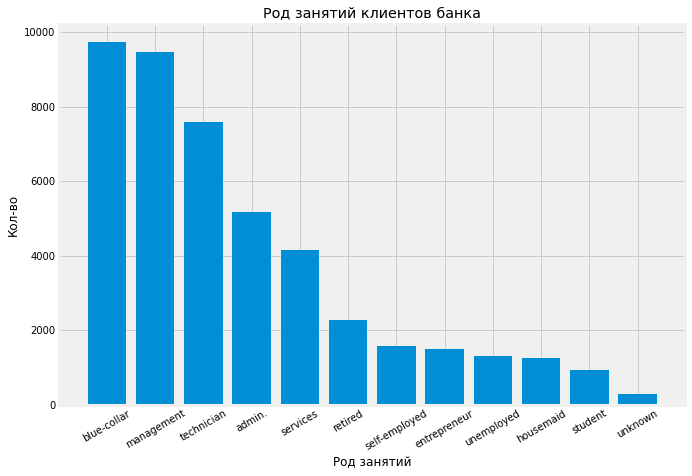

In [22]:
# Строим столбчатую диаграмму

plt.figure(figsize = (10,7))

plt.bar(data['index'],data['job'])

plt.title('Род занятий клиентов банка')
plt.xlabel('Род занятий')
plt.ylabel('Кол-во')
plt.xticks(rotation = 30)

plt.show()

In [ ]:
# Готовим данные для графика
data = pd.crosstab(df['job'],df['y']).reset_index().sort_values(by = 'no', ascending = False)
data.head()

y,job,no,yes
1,blue-collar,9024,708
4,management,8157,1301
9,technician,6757,840
0,admin.,4540,631
7,services,3785,369


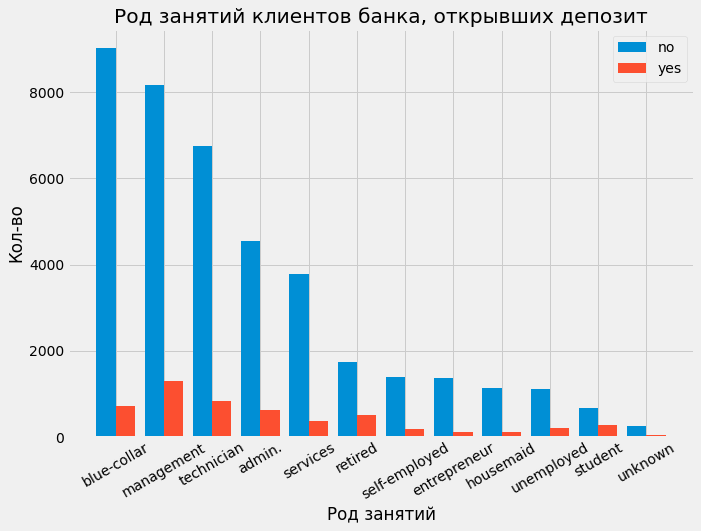

In [ ]:
# Строим столбчатую многорядную диаграмму

plt.figure(figsize = (10,7))

# определяем кол-во делений
import numpy as np
n_ticks = np.arange(len(data['no']))
# определяем сдвиг
offset = 0.2
# определяем ширину столбцов
w = 0.4

# добавляем сдвиг к кол-ву делений
plt.bar(n_ticks - offset, data['no'], width=w)
plt.bar(n_ticks + offset, data['yes'], width=w)

plt.title('Род занятий клиентов банка, открывших депозит')
plt.xlabel('Род занятий')
plt.ylabel('Кол-во')
plt.legend(['no','yes'])
plt.xticks(n_ticks, data['job'], rotation = 30) #добавляем метки делений

plt.show()

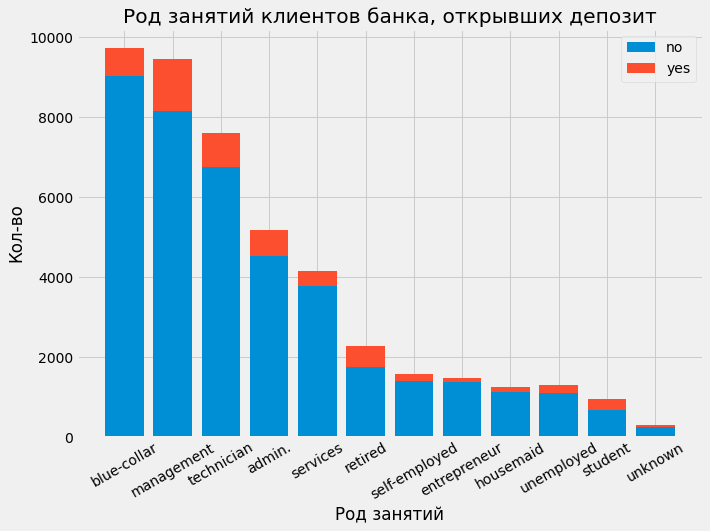

In [ ]:
# Строим столбчатую многорядную сложенную диаграмму

plt.figure(figsize = (10,7))

plt.bar(data['job'], data['no'])
plt.bar(data['job'], data['yes'], bottom = data['no'])

plt.title('Род занятий клиентов банка, открывших депозит')
plt.xlabel('Род занятий')
plt.ylabel('Кол-во')
plt.legend(['no','yes'])
plt.xticks(rotation = 30)

plt.show()

In [ ]:
# Готовим данные для графика
data = pd.crosstab(df['job'],df['y'], normalize = 'index').reset_index().sort_values(by = 'no', ascending = False)
data.head()

y,job,no,yes
1,blue-collar,0.927250,0.072750
2,entrepreneur,0.917283,0.082717
3,housemaid,0.912097,0.087903
7,services,0.911170,0.088830
9,technician,0.889430,0.110570


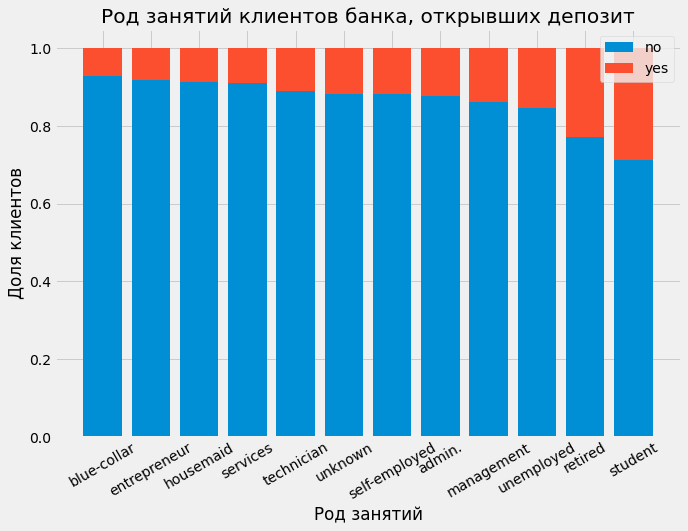

In [ ]:
# Строим столбчатую многорядную сложенную диаграмму

plt.figure(figsize = (10,7))

plt.bar(data['job'], data['no'])
plt.bar(data['job'], data['yes'], bottom = data['no'])

plt.title('Род занятий клиентов банка, открывших депозит')
plt.xlabel('Род занятий')
plt.ylabel('Доля клиентов')
plt.legend(['no','yes'])
plt.xticks(rotation = 30)

plt.show()

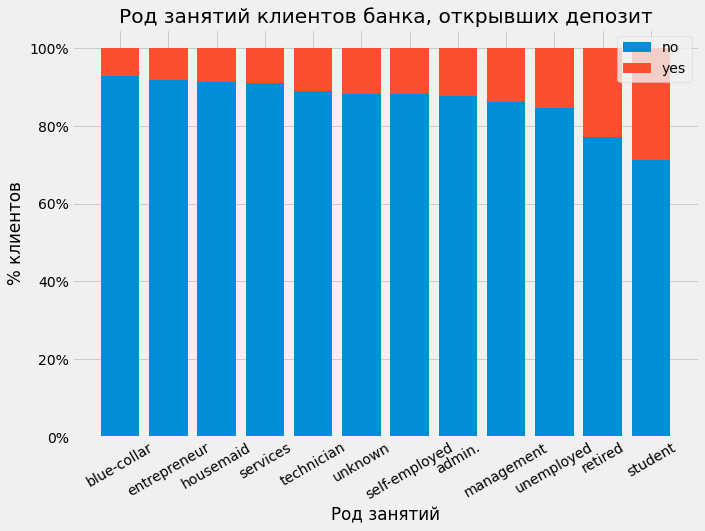

In [ ]:
# Строим столбчатую многорядную сложенную диаграмму c %-тами

fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(1,1,1)

plt.bar(data['job'], data['no'])
plt.bar(data['job'], data['yes'], bottom = data['no'])

plt.title('Род занятий клиентов банка, открывших депозит')
plt.xlabel('Род занятий')
plt.ylabel('% клиентов')
plt.legend(['no','yes'])
plt.xticks(rotation = 30)

from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter(xmax=1));

plt.show()

In [ ]:
# Готовим данные для графика
data = df['y'].value_counts()
data.head()

no     39922
yes     5289
Name: y, dtype: int64

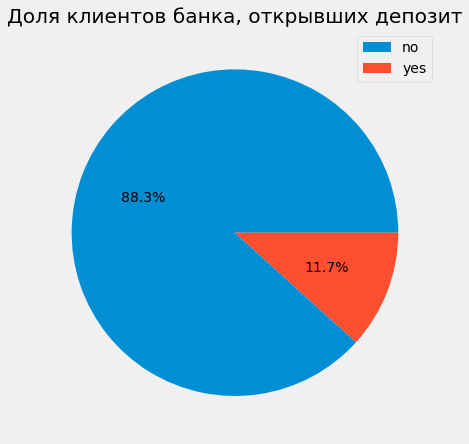

In [ ]:
# Строим круговую диаграмму

plt.figure(figsize = (10,7))

plt.pie(data, autopct='%1.1f%%')

plt.title('Доля клиентов банка, открывших депозит')
plt.legend(data.index)

plt.show()

In [ ]:
data = pd.crosstab(df['marital'], df['education'], normalize='index').reset_index()
data.head()

education,marital,primary,secondary,tertiary,unknown
0,divorced,0.144421,0.540618,0.282504,0.032456
1,married,0.192768,0.505990,0.258617,0.042625
2,single,0.066693,0.517357,0.374668,0.041282


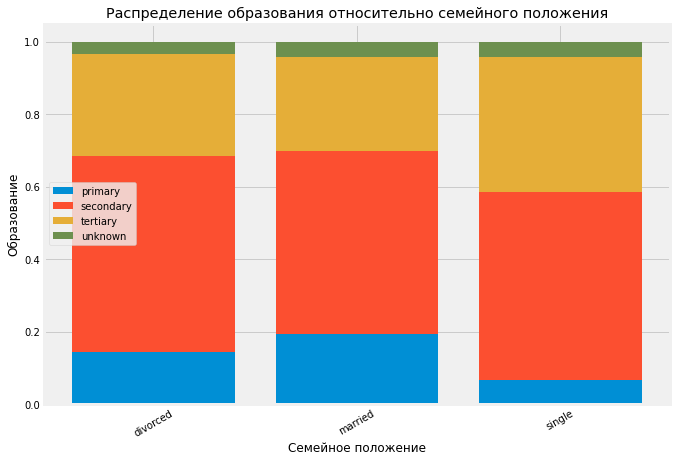

In [59]:
plt.figure(figsize = (10,7))

plt.bar(data['marital'], data['primary'])
plt.bar(data['marital'], data['secondary'], bottom = data['primary'])
plt.bar(data['marital'], data['tertiary'], bottom = data['primary'] + data['secondary'])
plt.bar(data['marital'], data['unknown'], bottom = data['primary'] + data['secondary']+data['tertiary'])


plt.title('Распределение образования относительно семейного положения')
plt.xlabel('Семейное положение')
plt.ylabel('Образование')
plt.legend(['primary','secondary', 'tertiary', 'unknown'])
plt.xticks(rotation = 30)

plt.show()

In [8]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,5,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,5,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,5,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,5,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,5,198,1,-1,0,unknown,no


In [20]:
data = df['job'].value_counts().reset_index()
data.head()

,index,job
0,blue-collar,9732
1,management,9458
2,technician,7597
3,admin.,5171
4,services,4154


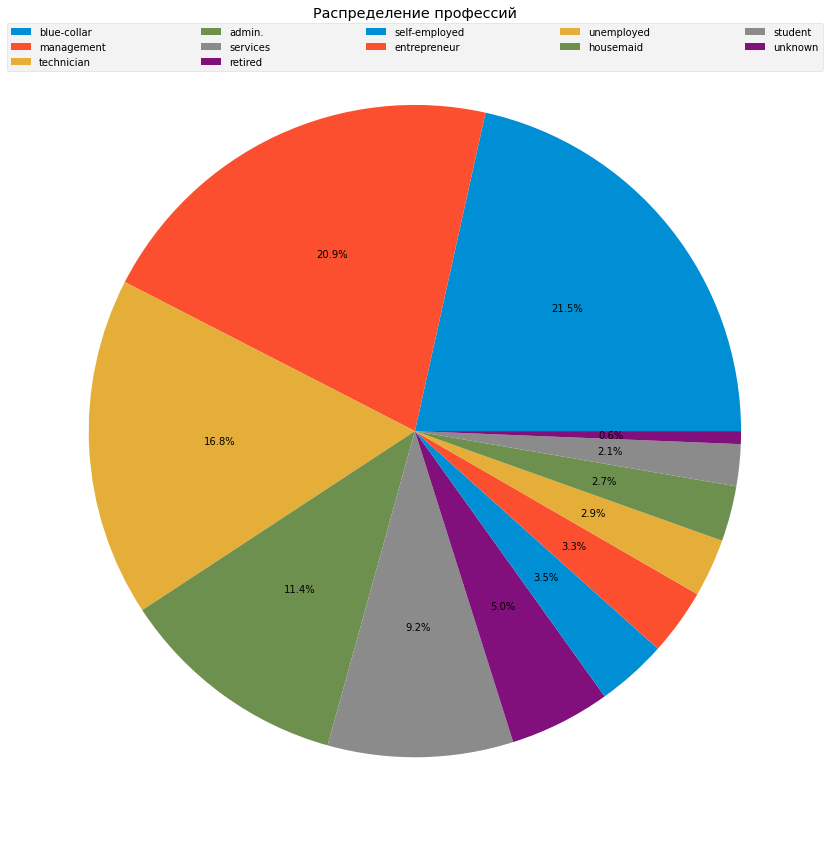

In [43]:
# https://pythonguides.com/matplotlib-pie-chart/
# 
# Для того, чтобы поменять положение легенды, в функцию legend() нужно передать именованный параметр loc, 
# который может быть разных типов:
# - Строкой.
# - Целочисленным значением.
# - Кортежем из двух значений, задающих координаты легенды.
# Первые два пункта действуют одинаково. В библиотеке Matplotlib существуют строковые константы и соответствующие им целочисленные константы, которые описывают, где должна располагаться легенда. Эти константы приведены в следующей таблице:

# 'best'	0
# 'upper right'	1
# 'upper left'	2
# 'lower left'	3
# 'lower right'	4
# 'right'	5
# 'center left'	6
# 'center right'	7
# 'lower center'	8
# 'upper center'	9
# 'center'	10

# В функцию legend() можно передать также параметр mode, 
# который может принимать значение либо None - это значение по умолчанию, 
# либо строку 'expand' - это будет означать, что легенду надо расширить на всю ширину графика. 
# 
plt.figure(figsize = (15,15))

patches, texts, pcts = plt.pie(data['job'], autopct='%1.1f%%', labels = data['job'], labeldistance=1.1)
for i, patch in enumerate(patches): texts[i].set_color('white')



plt.title('Распределение профессий')
plt.legend(data['index'], 
            loc = 'upper center', mode='expand',
            borderaxespad=0,
            ncol=5)

plt.show()

# Библиотека Seaborn

In [47]:
from sklearn import datasets

In [55]:
data = datasets.fetch_california_housing()
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [51]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [54]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [52]:
# Строим корреляциогнную матрицу
correlation = df.corr()
correlation

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


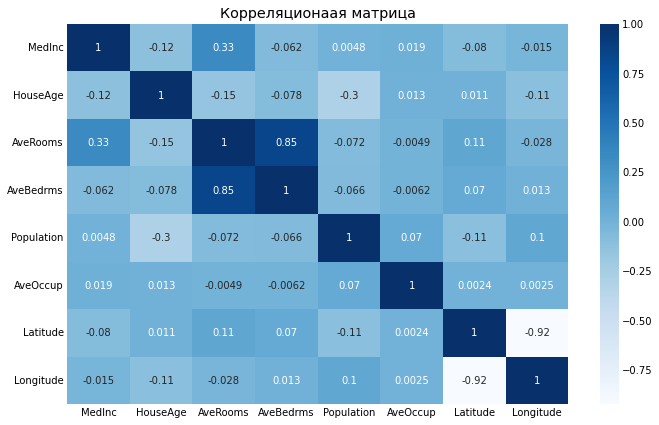

In [53]:
# Строим хитмэп по матрице корреляций
plt.figure(figsize = (10,7))
sns.heatmap(correlation, cmap = 'Blues', annot = True)
plt.title('Корреляционаая матрица')
plt.show()

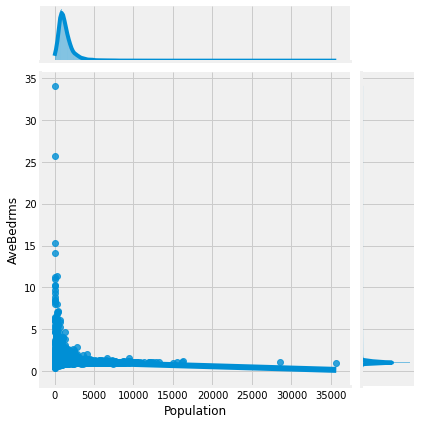

In [56]:
# Построим совместное распределение по двум переменным
sns.jointplot(x=df['Population'], y=df['AveBedrms'], data=df, kind='reg')

In [60]:
# Готовим данные
data = df[['MedInc','HouseAge','AveRooms', 'Population']]
data.head()

,MedInc,HouseAge,AveRooms,Population
0,8.3252,41.0,6.984127,322.0
1,8.3014,21.0,6.238137,2401.0
2,7.2574,52.0,8.288136,496.0
3,5.6431,52.0,5.817352,558.0
4,3.8462,52.0,6.281853,565.0


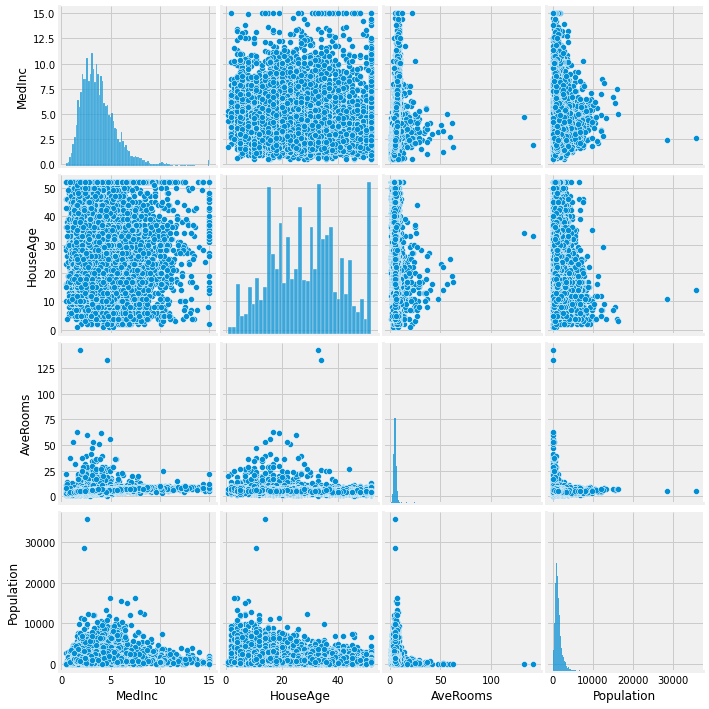

In [61]:
# Строим попарные отношения переменных
sns.pairplot(data)

In [ ]:
# Готовим данные
df['higher 150000'] = df['median_house_value'] > 150000
data = df[['higher 150000', 'median_income', 'population', 'total_rooms']]
data.head()

,higher 150000,median_income,population,total_rooms
0,False,1.4936,1015.0,5612.0
1,False,1.8200,1129.0,7650.0
2,False,1.6509,333.0,720.0
3,False,3.1917,515.0,1501.0
4,False,1.9250,624.0,1454.0


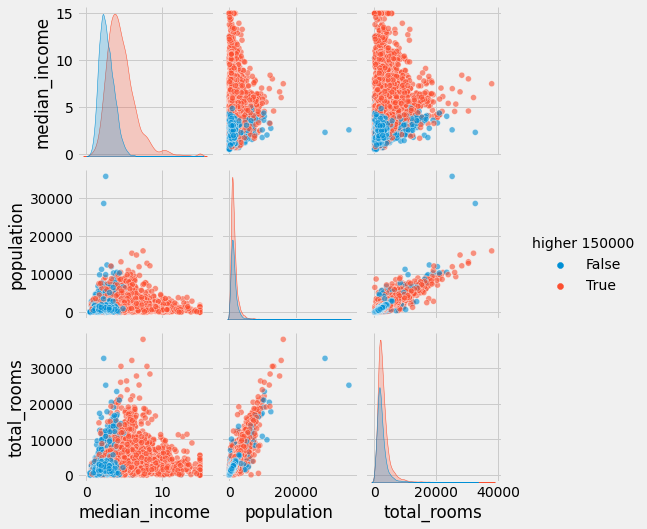

In [ ]:
sns.pairplot(data, hue = 'higher 150000', plot_kws = {'alpha': 0.6})